<a href="https://colab.research.google.com/github/madhusowmya/madhusowmya.github.io/blob/master/CNN_2lr_%3D_0_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd
import tensorflow as tf
tf.config.experimental_run_functions_eagerly(True)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Instructions for updating:
Use `tf.config.run_functions_eagerly` instead of the experimental version.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Trainn_cnn.csv')
test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Testt_cnn.csv')

In [ ]:
y = train['label']
print(y)
train = train.drop('label',  axis =1)
#print(train)

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64


In [ ]:
train=train/225.0#pixels normalizing 
#print(type(train))#df
test = test/225.0
train = np.array(train)
print(train.size)#array
test = np.array(test)
print(test.size)
train = train.reshape(train.shape[0], 28, 28,1)#reshaping 
test = test.reshape(test.shape[0], 28, 28,1)

32928000
21952000


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(train, y, test_size=0.2)


In [ ]:
#Converting the train and validation labels to one-hot encodings
Y_train = tf.keras.utils.to_categorical(Y_train, num_classes=10)
Y_test= tf.keras.utils.to_categorical(Y_test, num_classes=10)
print(Y_train[1:10])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [ ]:
#Preparing a CNN model architecture
model1 = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(64, (5,5), activation='relu', kernel_initializer='he_uniform',input_shape=(28, 28, 1)),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Conv2D(128, (5,5), activation='relu'),
            tf.keras.layers.MaxPooling2D(2, 2),
            
            
            tf.keras.layers.Dropout(0.25),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dense(10, activation='softmax')
    ])
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 64)        1664      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 128)         204928    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 4, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0

In [ ]:
# from keras.utils import plot_model
# plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)
# from IPython.display import Image
# Image("model.png")

In [ ]:
#Compiling the model OPTIMIZER IS SGD 
model1.compile(optimizer= tf.keras.optimizers.SGD(lr=0.05, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])
#Data augmentation to prevent overfitting
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rotation_range=30, 
        zoom_range = 0.2, 
        width_shift_range=0.1,  
        height_shift_range=0.1,)  
history1 = model1.fit_generator(datagen.flow(X_train, Y_train,batch_size=64),validation_data=(X_test, Y_test),epochs=15,steps_per_epoch=X_train.shape[0] // 64)


Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/15


/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


525/525 [==============================] - 24s 46ms/step - loss: 0.5355 - accuracy: 0.8264 - val_loss: 0.0703 - val_accuracy: 0.9782
Epoch 2/15
525/525 [==============================] - 24s 45ms/step - loss: 0.1825 - accuracy: 0.9419 - val_loss: 0.0628 - val_accuracy: 0.9798
Epoch 3/15
525/525 [==============================] - 23s 44ms/step - loss: 0.1404 - accuracy: 0.9568 - val_loss: 0.0536 - val_accuracy: 0.9851
Epoch 4/15
525/525 [==============================] - 23s 45ms/step - loss: 0.1195 - accuracy: 0.9633 - val_loss: 0.0446 - val_accuracy: 0.9852
Epoch 5/15
525/525 [==============================] - 23s 44ms/step - loss: 0.1007 - accuracy: 0.9676 - val_loss: 0.0805 - val_accuracy: 0.9735
Epoch 6/15
525/525 [==============================] - 24s 46ms/step - loss: 0.0902 - accuracy: 0.9721 - val_loss: 0.0414 - val_accuracy: 0.9871
Epoch 7/15
525/525 [==============================] - 24s 46ms/step - loss: 0.0875 - accuracy: 0.9726 - val_loss: 0.0399 - val_accuracy: 0.9880
Epo

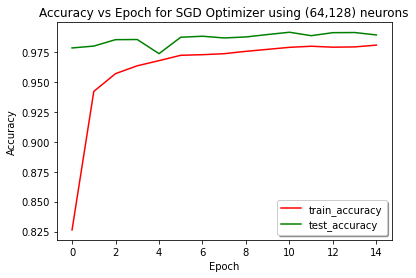

In [ ]:
#Comparing training and testing accuraries for the model in which number of nuerons increases from  (64,128) 
# plt.plot(history1.history['loss'], color='r')
# plt.plot(history1.history['val_loss'], color='g')
# plt.legend(('loss', 'val_loss'), loc='upper right', shadow=True)
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.show()
plt.plot(history1.history['accuracy'], color='r')
plt.plot(history1.history['val_accuracy'], color='g')
plt.legend(('train_accuracy', 'test_accuracy'), loc='best', shadow=True)
plt.title('Accuracy vs Epoch for SGD Optimizer using (64,128) neurons')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

In [ ]:
#Plotting Confusion Matrix
y_pred1 = model1.predict(X_test)
y_pred1 = np.argmax(y_pred1, axis=1)
y_true = np.argmax(Y_test, axis=1)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred1)
print(cm)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


[[833   0   1   1   0   0   0   0   0   0]
 [  0 956   2   0   0   0   1   5   0   0]
 [  0   0 861   5   0   0   0   8   0   1]
 [  0   0   1 857   0   1   0   1   1   1]
 [  0   0   1   0 802   0   0   2   5   4]
 [  1   0   0   6   0 717   5   1   0   0]
 [  3   0   1   0   3   1 796   0   1   0]
 [  0   0   1   0   0   0   0 890   0   0]
 [  1   0   1   1   0   0   5   0 815   2]
 [  0   0   0   0   1   1   0  11   5 781]]


RMS Prop

In [ ]:
#Preparing a CNN model architecture
model1 = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(64, (5,5), activation='relu', kernel_initializer='he_uniform',input_shape=(28, 28, 1)),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Conv2D(128, (5,5), activation='relu'),
            tf.keras.layers.MaxPooling2D(2, 2),
            
            
            tf.keras.layers.Dropout(0.25),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dense(10, activation='softmax')
    ])
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 24, 24, 64)        1664      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 128)         204928    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)             

In [ ]:
#Compiling the model OPTIMIZER IS RMSProp
model1.compile(optimizer= tf.keras.optimizers.RMSprop(lr=0.05, momentum=0.0,rho=0.9,epsilon=1e-07), loss='categorical_crossentropy', metrics=['accuracy'])
#Data augmentation to prevent overfitting
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rotation_range=30, 
        zoom_range = 0.2, 
        width_shift_range=0.1,  
        height_shift_range=0.1,)  
history_RMSprop = model1.fit_generator(datagen.flow(X_train, Y_train,batch_size=64),validation_data=(X_test, Y_test),epochs=15,steps_per_epoch=X_train.shape[0] // 64)

Epoch 1/15
  2/525 [..............................] - ETA: 13s - loss: 3.2109 - accuracy: 0.1719

/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


525/525 [==============================] - 27s 52ms/step - loss: 0.5173 - accuracy: 0.8433 - val_loss: 0.1100 - val_accuracy: 0.9707
Epoch 2/15
525/525 [==============================] - 27s 51ms/step - loss: 0.2227 - accuracy: 0.9336 - val_loss: 0.0762 - val_accuracy: 0.9790
Epoch 3/15
525/525 [==============================] - 27s 51ms/step - loss: 0.1909 - accuracy: 0.9445 - val_loss: 0.0819 - val_accuracy: 0.9830
Epoch 4/15
525/525 [==============================] - 27s 51ms/step - loss: 0.1694 - accuracy: 0.9513 - val_loss: 0.0573 - val_accuracy: 0.9844
Epoch 5/15
525/525 [==============================] - 28s 53ms/step - loss: 0.1597 - accuracy: 0.9550 - val_loss: 0.0537 - val_accuracy: 0.9867
Epoch 6/15
525/525 [==============================] - 27s 51ms/step - loss: 0.1515 - accuracy: 0.9586 - val_loss: 0.0477 - val_accuracy: 0.9876
Epoch 7/15
525/525 [==============================] - 28s 53ms/step - loss: 0.1420 - accuracy: 0.9618 - val_loss: 0.0455 - val_accuracy: 0.9877
Epo

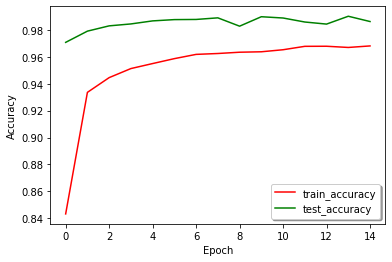

In [ ]:

plt.plot(history_RMSprop.history['accuracy'], color='r')
plt.plot(history_RMSprop.history['val_accuracy'], color='g')
plt.legend(('train_accuracy', 'test_accuracy'), loc='best', shadow=True)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()


ADAM

In [ ]:
#Preparing a CNN model architecture
model1 = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(64, (5,5), activation='relu', kernel_initializer='he_uniform',input_shape=(28, 28, 1)),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Conv2D(128, (5,5), activation='relu'),
            tf.keras.layers.MaxPooling2D(2, 2),
            
            
            tf.keras.layers.Dropout(0.25),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dense(10, activation='softmax')
    ])
#model1.summary()

In [ ]:
#Compiling the model OPTIMIZER IS Adam
model1.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.05, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False, name='Adam'), loss='categorical_crossentropy', metrics=['accuracy'])
#Data augmentation to prevent overfitting
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rotation_range=30, 
        zoom_range = 0.2, 
        width_shift_range=0.1,  
        height_shift_range=0.1,)  
history1_Adam = model1.fit_generator(datagen.flow(X_train, Y_train,batch_size=64),validation_data=(X_test, Y_test),epochs=15,steps_per_epoch=X_train.shape[0] // 64)


Epoch 1/15
  3/525 [..............................] - ETA: 14s - loss: 2.7666 - accuracy: 0.1771

/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


525/525 [==============================] - 23s 44ms/step - loss: 0.5229 - accuracy: 0.8322 - val_loss: 0.0695 - val_accuracy: 0.9785
Epoch 2/15
525/525 [==============================] - 23s 43ms/step - loss: 0.2673 - accuracy: 0.9199 - val_loss: 0.1202 - val_accuracy: 0.9626
Epoch 3/15
525/525 [==============================] - 23s 44ms/step - loss: 0.1993 - accuracy: 0.9377 - val_loss: 0.0631 - val_accuracy: 0.9804
Epoch 4/15
525/525 [==============================] - 23s 44ms/step - loss: 0.1742 - accuracy: 0.9485 - val_loss: 0.0612 - val_accuracy: 0.9818
Epoch 5/15
525/525 [==============================] - 23s 44ms/step - loss: 0.1781 - accuracy: 0.9483 - val_loss: 0.0609 - val_accuracy: 0.9843
Epoch 6/15
525/525 [==============================] - 24s 46ms/step - loss: 0.1521 - accuracy: 0.9551 - val_loss: 0.0493 - val_accuracy: 0.9856
Epoch 7/15
525/525 [==============================] - 23s 44ms/step - loss: 0.1434 - accuracy: 0.9577 - val_loss: 0.0594 - val_accuracy: 0.9846
Epo

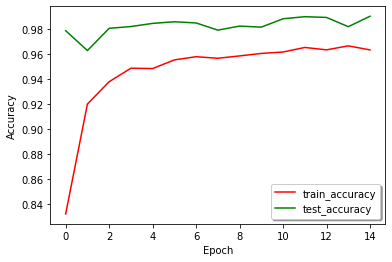

In [ ]:
plt.plot(history1_Adam.history['accuracy'], color='r')
plt.plot(history1_Adam.history['val_accuracy'], color='g')
plt.legend(('train_accuracy', 'test_accuracy'), loc='best', shadow=True)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

Adamax

In [ ]:
#Preparing a CNN model architecture
model1 = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(64, (5,5), activation='relu', kernel_initializer='he_uniform',input_shape=(28, 28, 1)),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Conv2D(128, (5,5), activation='relu'),
            tf.keras.layers.MaxPooling2D(2, 2),
            
            
            tf.keras.layers.Dropout(0.25),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dense(10, activation='softmax')
    ])
#model1.summary()

In [ ]:
#Compiling the model
model1.compile(optimizer= tf.keras.optimizers.Adamax(learning_rate=0.05, beta_1=0.9, beta_2=0.999, epsilon=1e-07,name='Adamax'),loss='categorical_crossentropy', metrics=['accuracy'])
#Data augmentation to prevent overfitting
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rotation_range=30, 
        zoom_range = 0.2, 
        width_shift_range=0.1,  
        height_shift_range=0.1,)
history_Adamax1 = model1.fit_generator(datagen.flow(X_train, Y_train,batch_size=64),validation_data=(X_test, Y_test),epochs=15,steps_per_epoch=X_train.shape[0] // 64)


Epoch 1/15
  1/525 [..............................] - ETA: 0s - loss: 3.1610 - accuracy: 0.0781

/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


525/525 [==============================] - 23s 45ms/step - loss: 0.5356 - accuracy: 0.8268 - val_loss: 0.0829 - val_accuracy: 0.9769
Epoch 2/15
525/525 [==============================] - 23s 45ms/step - loss: 0.2039 - accuracy: 0.9359 - val_loss: 0.0672 - val_accuracy: 0.9793
Epoch 3/15
525/525 [==============================] - 23s 43ms/step - loss: 0.1699 - accuracy: 0.9465 - val_loss: 0.0550 - val_accuracy: 0.9818
Epoch 4/15
525/525 [==============================] - 23s 45ms/step - loss: 0.1442 - accuracy: 0.9542 - val_loss: 0.0599 - val_accuracy: 0.9819
Epoch 5/15
525/525 [==============================] - 23s 45ms/step - loss: 0.1326 - accuracy: 0.9580 - val_loss: 0.0516 - val_accuracy: 0.9855
Epoch 6/15
525/525 [==============================] - 24s 46ms/step - loss: 0.1187 - accuracy: 0.9635 - val_loss: 0.0552 - val_accuracy: 0.9855
Epoch 7/15
525/525 [==============================] - 23s 44ms/step - loss: 0.1050 - accuracy: 0.9685 - val_loss: 0.0383 - val_accuracy: 0.9894
Epo

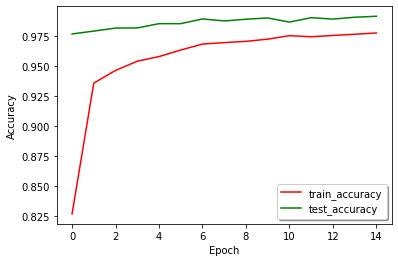

In [ ]:
plt.plot(history_Adamax1.history['accuracy'], color='r')
plt.plot(history_Adamax1.history['val_accuracy'], color='g')
plt.legend(('train_accuracy', 'test_accuracy'), loc='best', shadow=True)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

AdaGrad

In [ ]:
#Preparing a CNN model architecture
model1 = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(64, (5,5), activation='relu', kernel_initializer='he_uniform',input_shape=(28, 28, 1)),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Conv2D(128, (5,5), activation='relu'),
            tf.keras.layers.MaxPooling2D(2, 2),
            
            
            tf.keras.layers.Dropout(0.25),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dense(10, activation='softmax')
    ])
#model1.summary()

In [ ]:
#Compiling the model
model1.compile(optimizer= tf.keras.optimizers.Adagrad(learning_rate=0.05,initial_accumulator_value=0.1, epsilon=1e-07,name='Adagrad'),loss='categorical_crossentropy', metrics=['accuracy'])
#Data augmentation to prevent overfitting
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rotation_range=30, 
        zoom_range = 0.2, 
        width_shift_range=0.1,  
        height_shift_range=0.1,)
history_Adagrad1 = model1.fit_generator(datagen.flow(X_train, Y_train,batch_size=64),validation_data=(X_test, Y_test),epochs=15,steps_per_epoch=X_train.shape[0] // 64)


Epoch 1/15
  3/525 [..............................] - ETA: 15s - loss: 2.4717 - accuracy: 0.2396

/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


525/525 [==============================] - 24s 45ms/step - loss: 0.4848 - accuracy: 0.8454 - val_loss: 0.0637 - val_accuracy: 0.9801
Epoch 2/15
525/525 [==============================] - 23s 44ms/step - loss: 0.1761 - accuracy: 0.9455 - val_loss: 0.0489 - val_accuracy: 0.9865
Epoch 3/15
525/525 [==============================] - 23s 44ms/step - loss: 0.1324 - accuracy: 0.9591 - val_loss: 0.0462 - val_accuracy: 0.9852
Epoch 4/15
525/525 [==============================] - 24s 45ms/step - loss: 0.1158 - accuracy: 0.9643 - val_loss: 0.0424 - val_accuracy: 0.9874
Epoch 5/15
525/525 [==============================] - 23s 44ms/step - loss: 0.1028 - accuracy: 0.9679 - val_loss: 0.0379 - val_accuracy: 0.9886
Epoch 6/15
525/525 [==============================] - 22s 43ms/step - loss: 0.0919 - accuracy: 0.9724 - val_loss: 0.0406 - val_accuracy: 0.9882
Epoch 7/15
525/525 [==============================] - 23s 43ms/step - loss: 0.0866 - accuracy: 0.9729 - val_loss: 0.0332 - val_accuracy: 0.9899
Epo

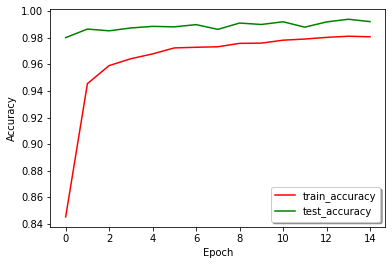

In [ ]:
plt.plot(history_Adagrad1.history['accuracy'], color='r')
plt.plot(history_Adagrad1.history['val_accuracy'], color='g')
plt.legend(('train_accuracy', 'test_accuracy'), loc='best', shadow=True)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

Adadelta

In [ ]:
#Preparing a CNN model architecture
model1 = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(64, (5,5), activation='relu', kernel_initializer='he_uniform',input_shape=(28, 28, 1)),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Conv2D(128, (5,5), activation='relu'),
            tf.keras.layers.MaxPooling2D(2, 2),
            
            
            tf.keras.layers.Dropout(0.25),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dense(10, activation='softmax')
    ])
#model1.summary()

In [ ]:
1#Compiling the model
model1.compile(optimizer= tf.keras.optimizers.Adadelta(learning_rate=0.05, rho=0.95, epsilon=1e-07,name='Adadelta'),loss='categorical_crossentropy', metrics=['accuracy'])
#Data augmentation to prevent overfitting
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rotation_range=30, 
        zoom_range = 0.2, 
        width_shift_range=0.1,  
        height_shift_range=0.1,)
history_Adadelta1 = model1.fit_generator(datagen.flow(X_train, Y_train,batch_size=64),validation_data=(X_test, Y_test),epochs=15,steps_per_epoch=X_train.shape[0] // 64)


Epoch 1/15
  3/525 [..............................] - ETA: 14s - loss: 2.9674 - accuracy: 0.0938

/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


525/525 [==============================] - 22s 43ms/step - loss: 1.4501 - accuracy: 0.5251 - val_loss: 0.3015 - val_accuracy: 0.9392
Epoch 2/15
525/525 [==============================] - 23s 44ms/step - loss: 0.7152 - accuracy: 0.7780 - val_loss: 0.1639 - val_accuracy: 0.9599
Epoch 3/15
525/525 [==============================] - 24s 45ms/step - loss: 0.4987 - accuracy: 0.8506 - val_loss: 0.1156 - val_accuracy: 0.9702
Epoch 4/15
525/525 [==============================] - 22s 43ms/step - loss: 0.3957 - accuracy: 0.8821 - val_loss: 0.0979 - val_accuracy: 0.9752
Epoch 5/15
525/525 [==============================] - 22s 43ms/step - loss: 0.3293 - accuracy: 0.9010 - val_loss: 0.0786 - val_accuracy: 0.9783
Epoch 6/15
525/525 [==============================] - 23s 44ms/step - loss: 0.2870 - accuracy: 0.9145 - val_loss: 0.0714 - val_accuracy: 0.9801
Epoch 7/15
525/525 [==============================] - 22s 42ms/step - loss: 0.2536 - accuracy: 0.9234 - val_loss: 0.0665 - val_accuracy: 0.9807
Epo

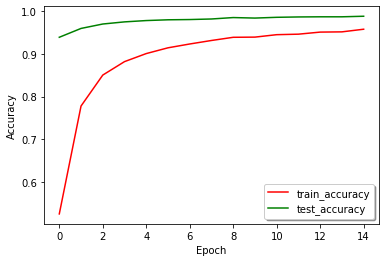

In [ ]:
plt.plot(history_Adadelta1.history['accuracy'], color='r')
plt.plot(history_Adadelta1.history['val_accuracy'], color='g')
plt.legend(('train_accuracy', 'test_accuracy'), loc='best', shadow=True)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

Nadam

In [ ]:
#Preparing a CNN model architecture
model1 = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(64, (5,5), activation='relu', kernel_initializer='he_uniform',input_shape=(28, 28, 1)),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Conv2D(128, (5,5), activation='relu'),
            tf.keras.layers.MaxPooling2D(2, 2),
            
            
            tf.keras.layers.Dropout(0.25),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dense(10, activation='softmax')
    ])
#model1.summary()

In [ ]:
#Compiling the model
model1.compile(optimizer= tf.keras.optimizers.Nadam(learning_rate=0.05,epsilon=1e-07,name='NAdam'),loss='categorical_crossentropy', metrics=['accuracy'])
#Data augmentation to prevent overfitting
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rotation_range=30, 
        zoom_range = 0.2, 
        width_shift_range=0.1,  
        height_shift_range=0.1,)
history_NAdam1 = model1.fit_generator(datagen.flow(X_train, Y_train,batch_size=64),validation_data=(X_test, Y_test),epochs=15,steps_per_epoch=X_train.shape[0] // 64)


Epoch 1/15
  1/525 [..............................] - ETA: 0s - loss: 2.9482 - accuracy: 0.0625

/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


525/525 [==============================] - 29s 56ms/step - loss: 0.4408 - accuracy: 0.8590 - val_loss: 0.0917 - val_accuracy: 0.9776
Epoch 2/15
525/525 [==============================] - 28s 54ms/step - loss: 0.2010 - accuracy: 0.9395 - val_loss: 0.0711 - val_accuracy: 0.9787
Epoch 3/15
525/525 [==============================] - 28s 53ms/step - loss: 0.1705 - accuracy: 0.9475 - val_loss: 0.0535 - val_accuracy: 0.9831
Epoch 4/15
525/525 [==============================] - 28s 53ms/step - loss: 0.1538 - accuracy: 0.9540 - val_loss: 0.0593 - val_accuracy: 0.9823
Epoch 5/15
525/525 [==============================] - 29s 55ms/step - loss: 0.1413 - accuracy: 0.9579 - val_loss: 0.0499 - val_accuracy: 0.9856
Epoch 6/15
525/525 [==============================] - 28s 53ms/step - loss: 0.1350 - accuracy: 0.9598 - val_loss: 0.0539 - val_accuracy: 0.9860
Epoch 7/15
525/525 [==============================] - 28s 53ms/step - loss: 0.1274 - accuracy: 0.9636 - val_loss: 0.0445 - val_accuracy: 0.9871
Epo

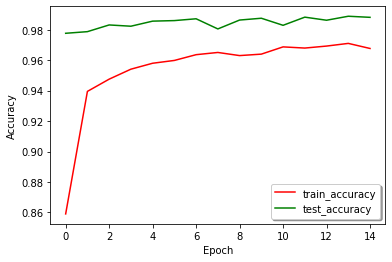

In [ ]:
plt.plot(history_NAdam1.history['accuracy'], color='r')
plt.plot(history_NAdam1.history['val_accuracy'], color='g')
plt.legend(('train_accuracy', 'test_accuracy'), loc='best', shadow=True)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

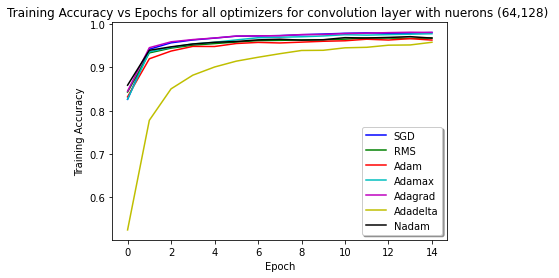

In [ ]:
plt.plot(history1.history['accuracy'], color='b')
plt.plot(history_RMSprop.history['accuracy'], color='g')
plt.plot(history1_Adam.history['accuracy'], color='r')
plt.plot(history_Adamax1.history['accuracy'], color='c')
plt.plot(history_Adagrad1.history['accuracy'], color='m')
plt.plot(history_Adadelta1.history['accuracy'], color='y')
plt.plot(history_NAdam1.history['accuracy'], color='k')
plt.legend(('SGD','RMS','Adam','Adamax','Adagrad','Adadelta','Nadam'),loc = 'best',shadow = True)
plt.ylabel('Training Accuracy')
plt.xlabel('Epoch')
plt.title('Training Accuracy vs Epochs for all optimizers for convolution layer with nuerons (64,128) ')
plt.show()



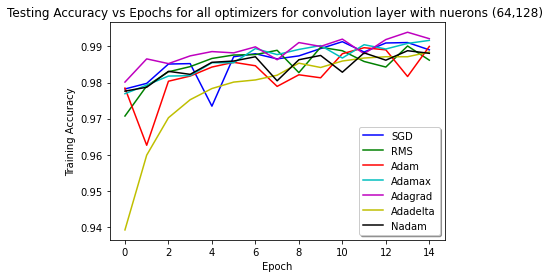

In [ ]:
plt.plot(history1.history['val_accuracy'], color='b')
plt.plot(history_RMSprop.history['val_accuracy'], color='g')
plt.plot(history1_Adam.history['val_accuracy'], color='r')
plt.plot(history_Adamax1.history['val_accuracy'], color='c')
plt.plot(history_Adagrad1.history['val_accuracy'], color='m')
plt.plot(history_Adadelta1.history['val_accuracy'], color='y')
plt.plot(history_NAdam1.history['val_accuracy'], color='k')
plt.legend(('SGD','RMS','Adam','Adamax','Adagrad','Adadelta','Nadam'),loc = 'best',shadow = True)
plt.ylabel('Training Accuracy')
plt.xlabel('Epoch')
plt.title('Testing Accuracy vs Epochs for all optimizers for convolution layer with nuerons (64,128) ')
plt.show()



(128,256)

In [ ]:
#Preparing a CNN model architecture (128,256)
model2 = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(128, (5,5), activation='relu', kernel_initializer='he_uniform',input_shape=(28, 28, 1)),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Conv2D(256, (5,5), activation='relu'),
            tf.keras.layers.MaxPooling2D(2, 2),
            
            
            tf.keras.layers.Dropout(0.25),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(256, activation='relu'),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dense(10, activation='softmax')
    ])
model2.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 24, 24, 128)       3328      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 12, 12, 128)       0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 12, 12, 128)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 8, 8, 256)         819456    
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 4, 4, 256)         0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 4, 4, 256)         0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 4096)             

SGD

In [ ]:
#Compiling the model
model2.compile(optimizer= tf.keras.optimizers.SGD(lr=0.1, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#Data augmentation to prevent overfitting
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rotation_range=30, 
        zoom_range = 0.2, 
        width_shift_range=0.1,  
        height_shift_range=0.1,)  


In [ ]:
history_SGD2 = model2.fit_generator(datagen.flow(X_train, Y_train,batch_size=64),validation_data=(X_test, Y_test),epochs=15,steps_per_epoch=X_train.shape[0] // 64)

Epoch 1/15


/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


525/525 [==============================] - 25s 47ms/step - loss: 0.6242 - accuracy: 0.7988 - val_loss: 0.0672 - val_accuracy: 0.9806
Epoch 2/15
525/525 [==============================] - 24s 46ms/step - loss: 0.1827 - accuracy: 0.9435 - val_loss: 0.0577 - val_accuracy: 0.9830
Epoch 3/15
525/525 [==============================] - 25s 48ms/step - loss: 0.1338 - accuracy: 0.9574 - val_loss: 0.0558 - val_accuracy: 0.9843
Epoch 4/15
525/525 [==============================] - 25s 47ms/step - loss: 0.1113 - accuracy: 0.9651 - val_loss: 0.0432 - val_accuracy: 0.9869
Epoch 5/15
525/525 [==============================] - 24s 46ms/step - loss: 0.1013 - accuracy: 0.9689 - val_loss: 0.0531 - val_accuracy: 0.9842
Epoch 6/15
525/525 [==============================] - 25s 48ms/step - loss: 0.0898 - accuracy: 0.9723 - val_loss: 0.0639 - val_accuracy: 0.9814
Epoch 7/15
525/525 [==============================] - 25s 48ms/step - loss: 0.0842 - accuracy: 0.9743 - val_loss: 0.0365 - val_accuracy: 0.9888
Epo

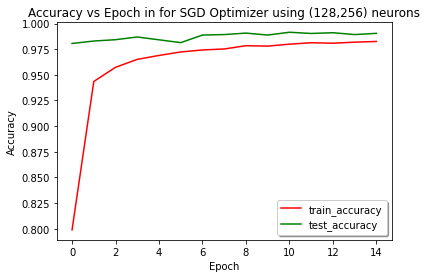

In [ ]:
plt.plot(history_SGD2.history['accuracy'], color='r')
plt.plot(history_SGD2.history['val_accuracy'], color='g')
plt.legend(('train_accuracy', 'test_accuracy'), loc='best', shadow=True)
plt.title('Accuracy vs Epoch in for SGD Optimizer using (128,256) neurons')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

In [ ]:
# #Plotting Confusion Matrix
# y_pred2 = model2.predict(X_val)
# y_pred2 = np.argmax(y_pred2, axis=1)
# y_true = np.argmax(Y_val, axis=1)
# from sklearn.metrics import confusion_matrix
# cm = confusion_matrix(y_true, y_pred2)
# #print(cm)

RMprop

In [ ]:
#Preparing a CNN model architecture (128,256)
model2 = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(128, (5,5), activation='relu', kernel_initializer='he_uniform',input_shape=(28, 28, 1)),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Conv2D(256, (5,5), activation='relu'),
            tf.keras.layers.MaxPooling2D(2, 2),
            
            
            tf.keras.layers.Dropout(0.25),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(256, activation='relu'),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dense(10, activation='softmax')
    ])
#model2.summary()

In [ ]:
 #Compiling the model OPTIMIZER IS SGD 
model2.compile(optimizer= tf.keras.optimizers.RMSprop(lr=0.001, momentum=0.0,rho=0.9,epsilon=1e-07), loss='categorical_crossentropy', metrics=['accuracy'])
#Data augmentation to prevent overfitting
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rotation_range=30, 
        zoom_range = 0.2, 
        width_shift_range=0.1,  
        height_shift_range=0.1,)  
history_RMSprop2 = model2.fit_generator(datagen.flow(X_train, Y_train,batch_size=64),validation_data=(X_test, Y_test),epochs=15,steps_per_epoch=X_train.shape[0] // 64)

Epoch 1/15
  1/525 [..............................] - ETA: 0s - loss: 3.4944 - accuracy: 0.0781

/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


525/525 [==============================] - 27s 52ms/step - loss: 0.4190 - accuracy: 0.8671 - val_loss: 0.0809 - val_accuracy: 0.9742
Epoch 2/15
525/525 [==============================] - 27s 51ms/step - loss: 0.1481 - accuracy: 0.9540 - val_loss: 0.0548 - val_accuracy: 0.9831
Epoch 3/15
525/525 [==============================] - 27s 51ms/step - loss: 0.1136 - accuracy: 0.9643 - val_loss: 0.0423 - val_accuracy: 0.9883
Epoch 4/15
525/525 [==============================] - 26s 50ms/step - loss: 0.0943 - accuracy: 0.9708 - val_loss: 0.0584 - val_accuracy: 0.9819
Epoch 5/15
525/525 [==============================] - 27s 51ms/step - loss: 0.0832 - accuracy: 0.9747 - val_loss: 0.0518 - val_accuracy: 0.9840
Epoch 6/15
525/525 [==============================] - 27s 51ms/step - loss: 0.0749 - accuracy: 0.9772 - val_loss: 0.0474 - val_accuracy: 0.9848
Epoch 7/15
525/525 [==============================] - 27s 52ms/step - loss: 0.0701 - accuracy: 0.9779 - val_loss: 0.0295 - val_accuracy: 0.9911
Epo

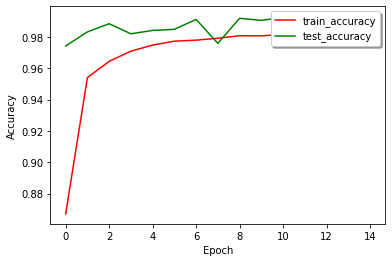

In [ ]:
plt.plot(history_RMSprop2.history['accuracy'], color='r')
plt.plot(history_RMSprop2.history['val_accuracy'], color='g')
plt.legend(('train_accuracy', 'test_accuracy'), loc='upper right', shadow=True)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

Adam

In [ ]:
#Preparing a CNN model architecture (128,256)
model2 = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(128, (5,5), activation='relu', kernel_initializer='he_uniform',input_shape=(28, 28, 1)),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Conv2D(256, (5,5), activation='relu'),
            tf.keras.layers.MaxPooling2D(2, 2),
            
            
            tf.keras.layers.Dropout(0.25),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(256, activation='relu'),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dense(10, activation='softmax')
    ])
#model2.summary()

In [ ]:
#Compiling the model
model2.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.05, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,name='Adam'),loss='categorical_crossentropy', metrics=['accuracy'])
#Data augmentation to prevent overfitting
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rotation_range=30, 
        zoom_range = 0.2, 
        width_shift_range=0.1,  
        height_shift_range=0.1,)
history_Adam2 = model2.fit_generator(datagen.flow(X_train, Y_train,batch_size=64),validation_data=(X_test, Y_test),epochs=15,steps_per_epoch=X_train.shape[0] // 64)

Epoch 1/15
  1/525 [..............................] - ETA: 0s - loss: 3.0810 - accuracy: 0.1562

/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


525/525 [==============================] - 25s 48ms/step - loss: 0.5632 - accuracy: 0.8235 - val_loss: 0.1090 - val_accuracy: 0.9683
Epoch 2/15
525/525 [==============================] - 25s 47ms/step - loss: 0.2513 - accuracy: 0.9240 - val_loss: 0.0798 - val_accuracy: 0.9781
Epoch 3/15
525/525 [==============================] - 26s 49ms/step - loss: 0.1938 - accuracy: 0.9422 - val_loss: 0.0672 - val_accuracy: 0.9815
Epoch 4/15
525/525 [==============================] - 25s 48ms/step - loss: 0.2258 - accuracy: 0.9368 - val_loss: 0.0746 - val_accuracy: 0.9808
Epoch 5/15
525/525 [==============================] - 25s 48ms/step - loss: 0.1776 - accuracy: 0.9503 - val_loss: 0.0527 - val_accuracy: 0.9867
Epoch 6/15
525/525 [==============================] - 24s 47ms/step - loss: 0.1839 - accuracy: 0.9515 - val_loss: 0.0700 - val_accuracy: 0.9821
Epoch 7/15
525/525 [==============================] - 25s 47ms/step - loss: 0.2064 - accuracy: 0.9501 - val_loss: 0.0598 - val_accuracy: 0.9844
Epo

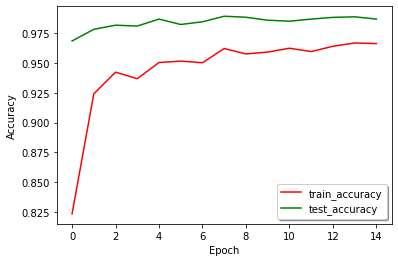

In [ ]:
plt.plot(history_Adam2.history['accuracy'], color='r')
plt.plot(history_Adam2.history['val_accuracy'], color='g')
plt.legend(('train_accuracy', 'test_accuracy'), loc='best', shadow=True)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

Adamax

In [ ]:
#Preparing a CNN model architecture (128,256)
model2 = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(128, (5,5), activation='relu', kernel_initializer='he_uniform',input_shape=(28, 28, 1)),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Conv2D(256, (5,5), activation='relu'),
            tf.keras.layers.MaxPooling2D(2, 2),
            
            
            tf.keras.layers.Dropout(0.25),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(256, activation='relu'),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dense(10, activation='softmax')
    ])
#model2.summary()

In [ ]:
#Compiling the model
model2.compile(optimizer= tf.keras.optimizers.Adamax(learning_rate=0.05, beta_1=0.9, beta_2=0.999, epsilon=1e-07,name='Adamax'),loss='categorical_crossentropy', metrics=['accuracy'])
#Data augmentation to prevent overfitting
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rotation_range=30, 
        zoom_range = 0.2, 
        width_shift_range=0.1,  
        height_shift_range=0.1,)
history_Adamax2 = model2.fit_generator(datagen.flow(X_train, Y_train,batch_size=64),validation_data=(X_test, Y_test),epochs=15,steps_per_epoch=X_train.shape[0] // 64)


Epoch 1/15
  1/525 [..............................] - ETA: 0s - loss: 3.1804 - accuracy: 0.0938

/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


525/525 [==============================] - 24s 46ms/step - loss: 0.4977 - accuracy: 0.8423 - val_loss: 0.0768 - val_accuracy: 0.9761
Epoch 2/15
525/525 [==============================] - 25s 47ms/step - loss: 0.1952 - accuracy: 0.9393 - val_loss: 0.0669 - val_accuracy: 0.9801
Epoch 3/15
525/525 [==============================] - 25s 47ms/step - loss: 0.1393 - accuracy: 0.9554 - val_loss: 0.0620 - val_accuracy: 0.9832
Epoch 4/15
525/525 [==============================] - 25s 47ms/step - loss: 0.1203 - accuracy: 0.9630 - val_loss: 0.0575 - val_accuracy: 0.9831
Epoch 5/15
525/525 [==============================] - 25s 48ms/step - loss: 0.1135 - accuracy: 0.9659 - val_loss: 0.0518 - val_accuracy: 0.9855
Epoch 6/15
525/525 [==============================] - 25s 48ms/step - loss: 0.1054 - accuracy: 0.9677 - val_loss: 0.0508 - val_accuracy: 0.9862
Epoch 7/15
525/525 [==============================] - 24s 46ms/step - loss: 0.1068 - accuracy: 0.9664 - val_loss: 0.0345 - val_accuracy: 0.9893
Epo

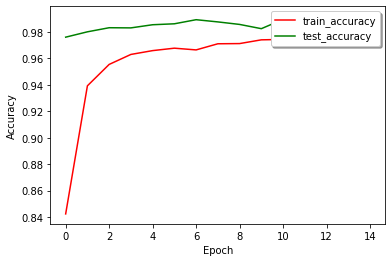

In [ ]:
plt.plot(history_Adamax2.history['accuracy'], color='r')
plt.plot(history_Adamax2.history['val_accuracy'], color='g')
plt.legend(('train_accuracy', 'test_accuracy'), loc='upper right', shadow=True)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

AdaGrad

In [ ]:
#Preparing a CNN model architecture (128,256)
model2 = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(128, (5,5), activation='relu', kernel_initializer='he_uniform',input_shape=(28, 28, 1)),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Conv2D(256, (5,5), activation='relu'),
            tf.keras.layers.MaxPooling2D(2, 2),
            
            
            tf.keras.layers.Dropout(0.25),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(256, activation='relu'),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dense(10, activation='softmax')
    ])
#model2.summary()

In [ ]:
#Compiling the model
model2.compile(optimizer= tf.keras.optimizers.Adagrad(learning_rate=0.05,initial_accumulator_value=0.1, epsilon=1e-07,name='Adagrad'),loss='categorical_crossentropy', metrics=['accuracy'])
#Data augmentation to prevent overfitting
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rotation_range=30, 
        zoom_range = 0.2, 
        width_shift_range=0.1,  
        height_shift_range=0.1,)
history_Adagrad2 = model2.fit_generator(datagen.flow(X_train, Y_train,batch_size=64),validation_data=(X_test, Y_test),epochs=15,steps_per_epoch=X_train.shape[0] // 64)


Epoch 1/15
  3/525 [..............................] - ETA: 13s - loss: 2.5897 - accuracy: 0.1719

/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


525/525 [==============================] - 24s 46ms/step - loss: 0.5116 - accuracy: 0.8348 - val_loss: 0.1035 - val_accuracy: 0.9673
Epoch 2/15
525/525 [==============================] - 25s 47ms/step - loss: 0.1769 - accuracy: 0.9443 - val_loss: 0.0762 - val_accuracy: 0.9765
Epoch 3/15
525/525 [==============================] - 25s 47ms/step - loss: 0.1330 - accuracy: 0.9576 - val_loss: 0.0412 - val_accuracy: 0.9869
Epoch 4/15
525/525 [==============================] - 25s 47ms/step - loss: 0.1097 - accuracy: 0.9657 - val_loss: 0.0451 - val_accuracy: 0.9865
Epoch 5/15
525/525 [==============================] - 24s 47ms/step - loss: 0.0956 - accuracy: 0.9694 - val_loss: 0.0415 - val_accuracy: 0.9879
Epoch 6/15
525/525 [==============================] - 25s 48ms/step - loss: 0.0825 - accuracy: 0.9744 - val_loss: 0.0367 - val_accuracy: 0.9888
Epoch 7/15
525/525 [==============================] - 25s 47ms/step - loss: 0.0783 - accuracy: 0.9752 - val_loss: 0.0332 - val_accuracy: 0.9913
Epo

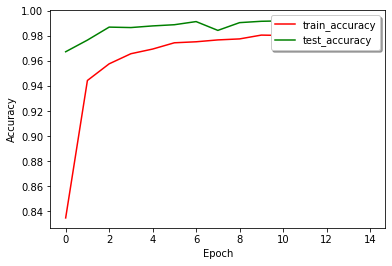

In [ ]:
plt.plot(history_Adagrad2.history['accuracy'], color='r')
plt.plot(history_Adagrad2.history['val_accuracy'], color='g')
plt.legend(('train_accuracy', 'test_accuracy'), loc='upper right', shadow=True)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

Adadelta

In [ ]:
#Preparing a CNN model architecture (128,256)
model2 = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(128, (5,5), activation='relu', kernel_initializer='he_uniform',input_shape=(28, 28, 1)),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Conv2D(256, (5,5), activation='relu'),
            tf.keras.layers.MaxPooling2D(2, 2),
            
            
            tf.keras.layers.Dropout(0.25),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(256, activation='relu'),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dense(10, activation='softmax')
    ])
#model2.summary()

In [ ]:
#Compiling the model
model2.compile(optimizer= tf.keras.optimizers.Adadelta(learning_rate=0.05, rho=0.95, epsilon=1e-07,name='Adadelta'),loss='categorical_crossentropy', metrics=['accuracy'])
#Data augmentation to prevent overfitting
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rotation_range=30, 
        zoom_range = 0.2, 
        width_shift_range=0.1,  
        height_shift_range=0.1,)
history_Adadelta2 = model2.fit_generator(datagen.flow(X_train, Y_train,batch_size=64),validation_data=(X_test, Y_test),epochs=15,steps_per_epoch=X_train.shape[0] // 64)


Epoch 1/15
  3/525 [..............................] - ETA: 14s - loss: 2.8970 - accuracy: 0.1198

/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


525/525 [==============================] - 25s 47ms/step - loss: 1.0033 - accuracy: 0.6740 - val_loss: 0.1486 - val_accuracy: 0.9596
Epoch 2/15
525/525 [==============================] - 25s 47ms/step - loss: 0.4243 - accuracy: 0.8690 - val_loss: 0.0939 - val_accuracy: 0.9751
Epoch 3/15
525/525 [==============================] - 24s 46ms/step - loss: 0.3017 - accuracy: 0.9058 - val_loss: 0.0668 - val_accuracy: 0.9799
Epoch 4/15
525/525 [==============================] - 24s 46ms/step - loss: 0.2386 - accuracy: 0.9253 - val_loss: 0.0586 - val_accuracy: 0.9833
Epoch 5/15
525/525 [==============================] - 24s 46ms/step - loss: 0.2073 - accuracy: 0.9366 - val_loss: 0.0562 - val_accuracy: 0.9842
Epoch 6/15
525/525 [==============================] - 24s 46ms/step - loss: 0.1812 - accuracy: 0.9447 - val_loss: 0.0485 - val_accuracy: 0.9849
Epoch 7/15
525/525 [==============================] - 24s 46ms/step - loss: 0.1615 - accuracy: 0.9504 - val_loss: 0.0409 - val_accuracy: 0.9870
Epo

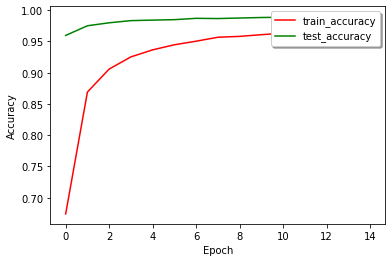

In [ ]:
plt.plot(history_Adadelta2.history['accuracy'], color='r')
plt.plot(history_Adadelta2.history['val_accuracy'], color='g')
plt.legend(('train_accuracy', 'test_accuracy'), loc='upper right', shadow=True)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

Nadam

In [ ]:
#Preparing a CNN model architecture (128,256)
model2 = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(128, (5,5), activation='relu', kernel_initializer='he_uniform',input_shape=(28, 28, 1)),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Conv2D(256, (5,5), activation='relu'),
            tf.keras.layers.MaxPooling2D(2, 2),
            
            
            tf.keras.layers.Dropout(0.25),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(256, activation='relu'),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dense(10, activation='softmax')
    ])
#model2.summary()

In [ ]:
#Compiling the model
model2.compile(optimizer= tf.keras.optimizers.Nadam(learning_rate=0.05,epsilon=1e-07,name='NAdam'),loss='categorical_crossentropy', metrics=['accuracy'])
#Data augmentation to prevent overfitting
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rotation_range=30, 
        zoom_range = 0.2, 
        width_shift_range=0.1,  
        height_shift_range=0.1,)
history_NAdam2 = model2.fit_generator(datagen.flow(X_train, Y_train,batch_size=64),validation_data=(X_test, Y_test),epochs=15,steps_per_epoch=X_train.shape[0] // 64)


Epoch 1/15
  2/525 [..............................] - ETA: 13s - loss: 3.1460 - accuracy: 0.1016

/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


525/525 [==============================] - 27s 51ms/step - loss: 0.4332 - accuracy: 0.8649 - val_loss: 0.1820 - val_accuracy: 0.9562
Epoch 2/15
525/525 [==============================] - 28s 53ms/step - loss: 0.1996 - accuracy: 0.9384 - val_loss: 0.0696 - val_accuracy: 0.9831
Epoch 3/15
525/525 [==============================] - 28s 54ms/step - loss: 0.1687 - accuracy: 0.9503 - val_loss: 0.0883 - val_accuracy: 0.9749
Epoch 4/15
525/525 [==============================] - 29s 55ms/step - loss: 0.1574 - accuracy: 0.9542 - val_loss: 0.0551 - val_accuracy: 0.9860
Epoch 5/15
525/525 [==============================] - 28s 53ms/step - loss: 0.1746 - accuracy: 0.9518 - val_loss: 0.0539 - val_accuracy: 0.9854
Epoch 6/15
525/525 [==============================] - 27s 52ms/step - loss: 0.1397 - accuracy: 0.9597 - val_loss: 0.0569 - val_accuracy: 0.9856
Epoch 7/15
525/525 [==============================] - 28s 52ms/step - loss: 0.1364 - accuracy: 0.9624 - val_loss: 0.0692 - val_accuracy: 0.9818
Epo

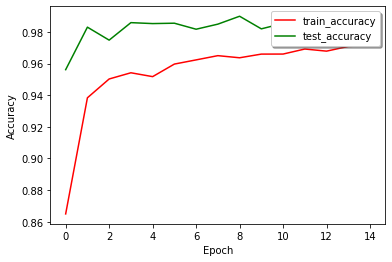

In [ ]:
plt.plot(history_NAdam2.history['accuracy'], color='r')
plt.plot(history_NAdam2.history['val_accuracy'], color='g')
plt.legend(('train_accuracy', 'test_accuracy'), loc='upper right', shadow=True)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

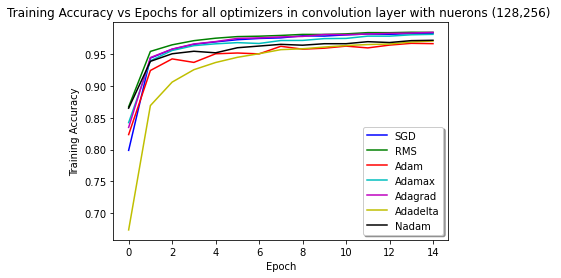

In [ ]:
plt.plot(history_SGD2.history['accuracy'], color='b')
plt.plot(history_RMSprop2.history['accuracy'], color='g')
plt.plot(history_Adam2.history['accuracy'], color='r')
plt.plot(history_Adamax2.history['accuracy'], color='c')
plt.plot(history_Adagrad2.history['accuracy'], color='m')
plt.plot(history_Adadelta2.history['accuracy'], color='y')
plt.plot(history_NAdam2.history['accuracy'], color='k')
plt.legend(('SGD','RMS','Adam','Adamax','Adagrad','Adadelta','Nadam'),loc = 'best',shadow = True)
plt.ylabel('Training Accuracy')
plt.xlabel('Epoch')
plt.title('Training Accuracy vs Epochs for all optimizers in convolution layer with nuerons (128,256) ')
plt.show()



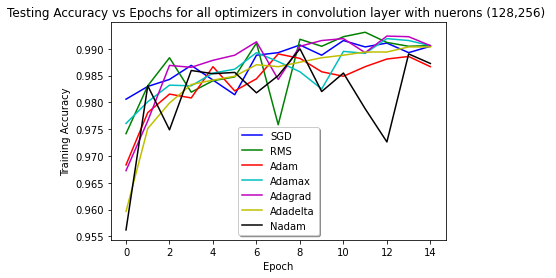

In [ ]:
plt.plot(history_SGD2.history['val_accuracy'], color='b')
plt.plot(history_RMSprop2.history['val_accuracy'], color='g')
plt.plot(history_Adam2.history['val_accuracy'], color='r')
plt.plot(history_Adamax2.history['val_accuracy'], color='c')
plt.plot(history_Adagrad2.history['val_accuracy'], color='m')
plt.plot(history_Adadelta2.history['val_accuracy'], color='y')
plt.plot(history_NAdam2.history['val_accuracy'], color='k')
plt.legend(('SGD','RMS','Adam','Adamax','Adagrad','Adadelta','Nadam'),loc = 'best',shadow = True)
plt.ylabel('Training Accuracy')
plt.xlabel('Epoch')
plt.title('Testing Accuracy vs Epochs for all optimizers in convolution layer with nuerons (128,256) ')
plt.show()



In [ ]:
print('DONE!')

DONE!
